# Importing Pacakages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

# Importing Data

In [2]:
data = pd.read_csv('C:\\Users\\ADITH SREE RAM\\Downloads\\archive\\Bhousedata.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Data preprocessing

In [3]:
data.shape # gives the shape of our data

(13320, 9)

In [4]:
data.groupby('area_type')['area_type'].agg('count')    # taking the 'area_type' column as a group and counting its values

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

groupby() function is used to split the data into groups based on some criteria and agg() function abbreviation of aggregate is used to define what we want to do with the grouped data.

In [5]:
data2 = data.drop(['area_type','society','balcony','availability'], axis='columns')     # dropping useless columns
data2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
data2.isnull().sum()     # finding all empty values in filtered column

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
data3 = data2.dropna()    # dropping rows with null values

In [8]:
data3.shape #checking the shape of our new data

(13246, 5)

In [9]:
data3['size'].unique()    # checking all the unique values in 'size' column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Both 4 BHK and 4 bedroom are same so, let's fix it

In [10]:
data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))    # getting the number of bedrooms from size column

c:\users\adith sree ram\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
data3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
data3[data3.bhk>20] 

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


we have outliers😂😅

In [13]:
data3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

as we see the there is a value of sqft in a particular range like '1133 - 1384' so, we will take the mean value 
of that and replace it.

In [14]:
#  Function to convert values into float dtype.
def is_float(x):

    try:
        float(x)
    except:
        return False
    return True

In [15]:
#Function to convert those unusual format of data
def convert_sqft_to_sum(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [16]:
data4 = data3.copy()
data4['total_sqft'] = data3['total_sqft'].apply(convert_sqft_to_sum)# applying our function
data4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [17]:
data4['price_per_sqft'] = data4['price'] * 100000/data4['total_sqft']  

created a nex column price_per_sqft which will be useful

In [18]:
len(data4.location.unique())

1304

In [19]:
data4.location = data4.location.apply(lambda x : x.strip()) # strip is used to remove the white spaces around the data points

In [20]:
location_stats = data4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [21]:
len(location_stats[location_stats<=10])    # totaling the places with very less houses

1052

In [22]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

Having many variables in a single column will make our model a very high dimensional case.
So, we are going to rename all these places who have 10 or less than 10 houses to 'other'

In [23]:
data4.location = data4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x) 

In [24]:
len(data4.location.unique())

242

In [25]:
data4[data4.total_sqft / data4.bhk < 300].head()  
# checking for outliners; practically speaking a house with 1407 sq. area can't have 6 bedrooms

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [26]:
data4.shape

(13246, 7)

In [27]:
data5 = data4[~(data4.total_sqft/data4.bhk<300)]

In [28]:
data5.shape

(12502, 7)

# Data Cleaning

In [29]:
def remove_pps_outliers(df):

    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): 
        m = np.mean(subdf.price_per_sqft)# calculating the mean
        st = np.std(subdf.price_per_sqft)# calculating standard deviation
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))] 
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [30]:
data6 = remove_pps_outliers(data5)
data6.shape

(10241, 7)

In [31]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [32]:
data7 = remove_bhk_outliers(data6)
data7.shape

(7329, 7)

Hurray!!!! Removed all our outliers

# Data Visualization

In [33]:
def plot_scatter_chart(df,location):
    
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price,color='red', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker='+',color='orange', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()

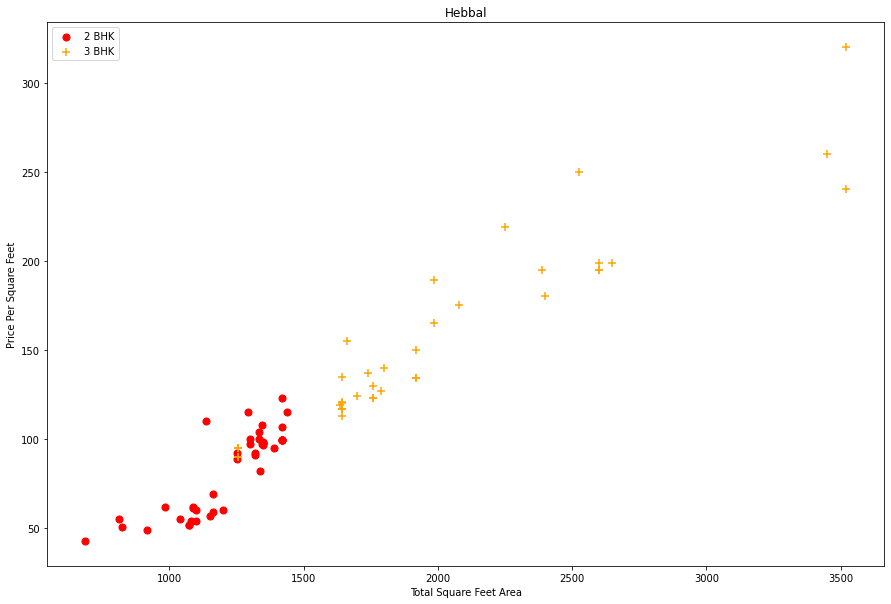

In [34]:
plot_scatter_chart(data7, 'Hebbal')

Text(0, 0.5, 'Count')

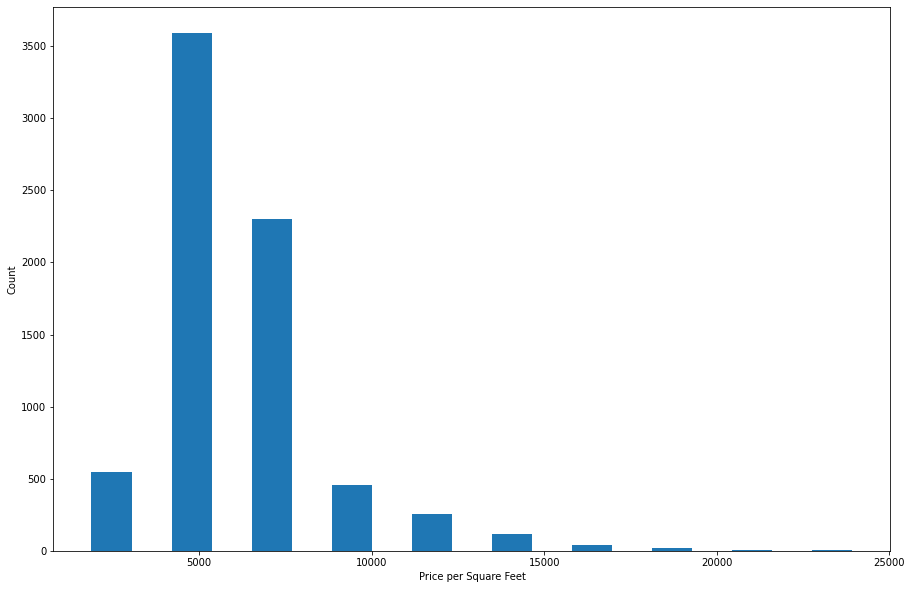

In [35]:
plt.hist(data7.price_per_sqft, rwidth=0.5)    # visualization the price_per_sqft column
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

In [36]:
data7.bath.unique() 

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Oops!!! some outliers remained as impostors in bath column

Text(0, 0.5, 'Count')

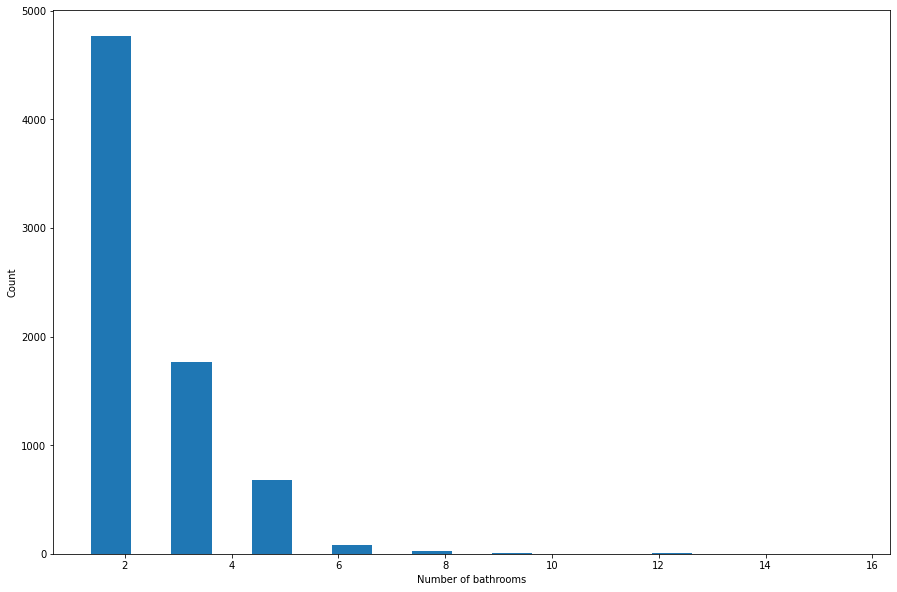

In [37]:
plt.hist(data7.bath, rwidth=0.5)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [38]:
data7[data7.bath > data7.bhk + 2]    # someone plz explain me how can one have more bathrooms that bedrooms 😂

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [39]:
data8 = data7[data7.bath < data7.bhk + 2]
data8.shape

(7251, 7)

In [40]:
#dropping 'size' and 'prize_per_sqft' as we don't require them any more
data8 = data8.drop(['size',"price_per_sqft"],axis='columns') 
data8.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# Creating Dummies

In [41]:
dummies = pd.get_dummies(data8.location)     
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# joining the dummy values again with the dataset except 'other' column
data9 = pd.concat([data8, dummies.drop('other', axis='columns')], axis='columns') 
data9.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# dropping 'location' column as now we have dummmies in its place.
data9 = data9.drop('location', axis='columns')    
data9.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting Data for Training and Spliting

In [45]:
# dropping price column as we don't want it in our train dataset
X = data9.drop('price', axis='columns')    
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#taking this to predict the price
y = data9.price

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)   

# Training our Models

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [60]:
lr_clf = LinearRegression()   
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8793470842677009

In [63]:
# ShuffleSplit is just a another type of splitting data
cv = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 0) 
cross_val_score(LinearRegression(), X, y, cv=cv)   

array([0.82131085, 0.79260163, 0.86146947, 0.82222335, 0.84077209])

Cross Validation is mainly used for the comparison of different models. For each model, you may get the average generalization error on the k validation sets. Then you will be able to choose the model with the lowest average generation error as your optimal model.

# Let's Predict

In [64]:
def predict_price(location,sqft,bath,bhk):

    loc_index = np.where(X.columns==location)[0][0]     # np.where() function returns the indices of elements in an input array where the given condition is satisfied.
    
    x = np.zeros(len(X.columns))    # np.zeros() function returns a new array of given shape and type, with zeros.
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [68]:
print(predict_price('1st Phase JP Nagar', 1000, 2, 3),'Lakhs')

83.06197478986073 Lakhs


In [70]:
print(predict_price('Whitefield', 1300, 2, 3),'Lakhs')

72.49739489926354 Lakhs


# Export the model to PICKLE FILE

In [72]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [73]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))